In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans as SklearnKMeans
from k_means_clustering import KMeansCluster

## Synthetic Data

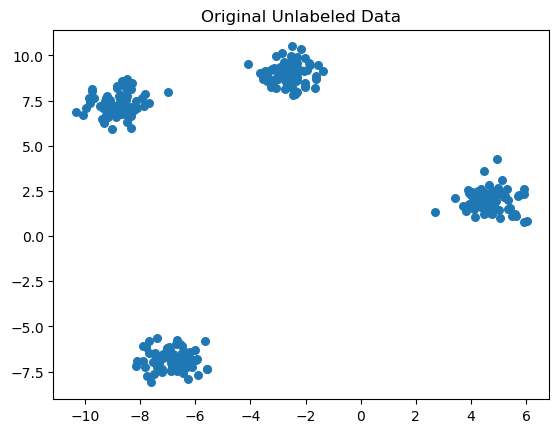

In [2]:
# Generate synthetic blob dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Plot raw data
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Original Unlabeled Data")
plt.show()

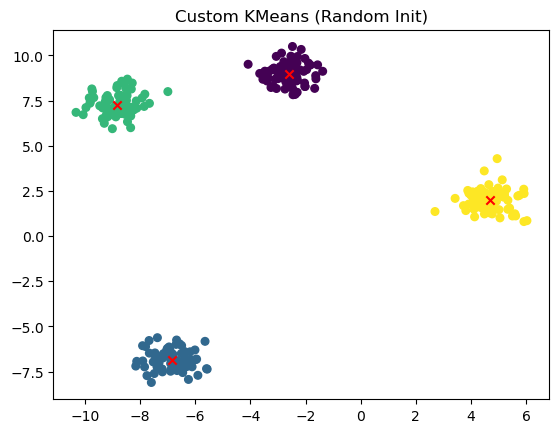

In [3]:
model_random = KMeansCluster(k=4, init='random', max_iter=100)
model_random.fit(X)
labels_random = model_random.predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels_random, cmap='viridis', s=30)
plt.scatter(np.array(model_random.centroids)[:, 0], np.array(model_random.centroids)[:, 1], c='red', marker='x')
plt.title("Custom KMeans (Random Init)")
plt.show()

## Iris Dataset & Comparison

In [4]:
# Load iris data
iris = load_iris()
X = iris.data
y_true = iris.target

# PCA used for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

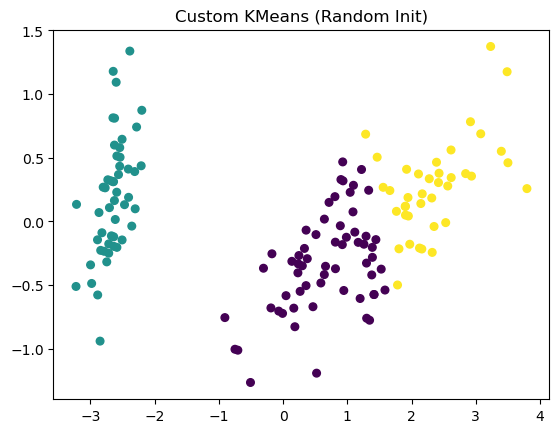

In [5]:
model_random = KMeansCluster(k=3, init='random', max_iter=100)
model_random.fit(X)
labels_random = model_random.predict(X)

# Plot
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_random, cmap='viridis', s=30)
plt.title("Custom KMeans (Random Init)")
plt.show()

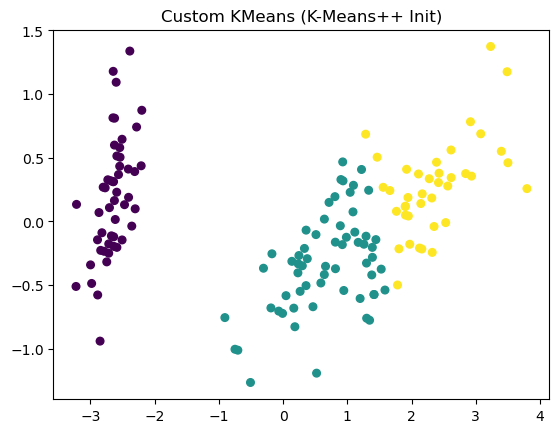

In [6]:
model_plus = KMeansCluster(k=3, init='k-means++', max_iter=100)
model_plus.fit(X)
labels_plus = model_plus.predict(X)

# Plot
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_plus, cmap='viridis', s=30)
plt.title("Custom KMeans (K-Means++ Init)")
plt.show()

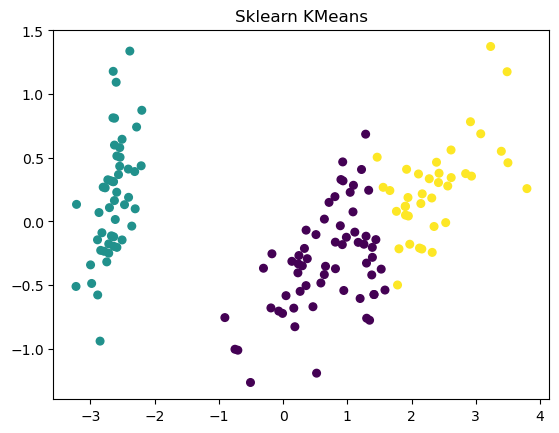

In [7]:
sk_model = SklearnKMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=42)
sk_model.fit(X)
labels_sk = sk_model.predict(X)

# Plot
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_sk, cmap='viridis', s=30)
plt.title("Sklearn KMeans")
plt.show()

In [8]:
print("Custom Model (Random) Inertia:", model_random.score(X))
print("Custom Model (KMeans++) Inertia:", model_plus.score(X))
print("Sklearn KMeans Inertia:", sk_model.inertia_)

Custom Model (Random) Inertia: 78.8556658259773
Custom Model (KMeans++) Inertia: 78.8556658259773
Sklearn KMeans Inertia: 78.85144142614601


## Digits Dataset & Comparison

In [9]:
# Load wine data
data = load_digits()
X = data.data
y_true = data.target

# PCA used for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [10]:
def align_labels(y_true, y_pred):
    D = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-D)  # maximize matching
    label_map = dict(zip(col_ind, row_ind))
    aligned_pred = np.array([label_map[label] for label in y_pred])
    return aligned_pred

def plot_confusion(title, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [11]:
# Custom KMeans (Random Init)
model_random = KMeansCluster(k=10, init='random', max_iter=100)
model_random.fit(X)
pred_random = model_random.predict(X)
pred_random_aligned = align_labels(y_true, pred_random)

# Custom KMeans (KMeans++ Init)
model_plus = KMeansCluster(k=10, init='k-means++', max_iter=100)
model_plus.fit(X)
pred_plus = model_plus.predict(X)
pred_plus_aligned = align_labels(y_true, pred_plus)

# Sklearn KMeans
sk_model = SklearnKMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=100, random_state=42)
sk_model.fit(X)
pred_sk = sk_model.predict(X)
pred_sk_aligned = align_labels(y_true, pred_sk)

print("Custom Model (Random) Inertia:", model_random.score(X))
print("Custom Model (KMeans++) Inertia:", model_plus.score(X))
print("Sklearn KMeans Inertia:", sk_model.inertia_)

Custom Model (Random) Inertia: 1169481.6863535298
Custom Model (KMeans++) Inertia: 1165440.5744214267
Sklearn KMeans Inertia: 1165256.299507351


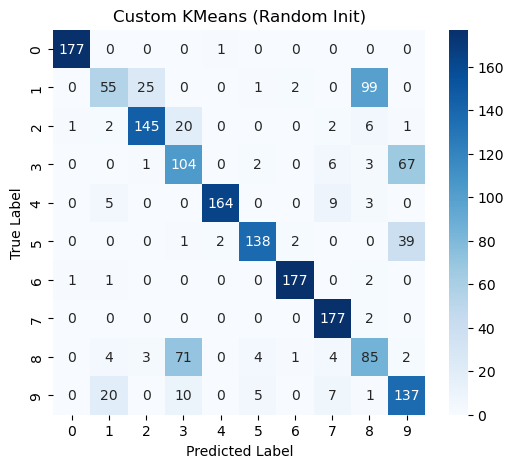

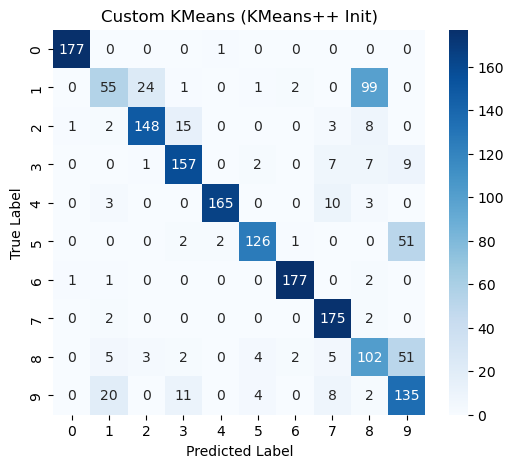

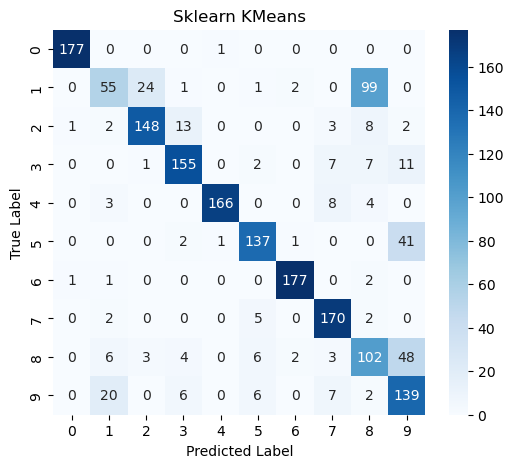

In [12]:
plot_confusion("Custom KMeans (Random Init)", y_true, pred_random_aligned)
plot_confusion("Custom KMeans (KMeans++ Init)", y_true, pred_plus_aligned)
plot_confusion("Sklearn KMeans", y_true, pred_sk_aligned)